In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Use a for loop to determine CSV file path

In [2]:
path = "/Users/richietownsend/Nashville Software School/NSS_Data_Analytics/Capstone/data/LA Metro"
list=[]
for (root, dirs, file) in os.walk(path):
    for f in file:
        if '.csv' in f:
            print('pd.read_csv(\'../data/LA Metro/'+f+'\')')

Load San Francisco CSV Files

In [3]:
la_metroQ119 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q1.csv')
la_metroQ219 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q2.csv')
la_metroQ319 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q3.csv')
la_metroQ419 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2019-q4.csv')
la_metroQ120 = pd.read_csv('../data/LA Metro/metro-bike-share-trips-2020-q1.csv')
la_metroQ220 = pd.read_csv('../data/LA Metro/metro-trips-2020-q2-v2.csv')
la_metroQ320 = pd.read_csv('../data/LA Metro/metro-trips-2020-q3.csv')
la_metroQ420 = pd.read_csv('../data/LA Metro/metro-trips-2020-q4.csv')
la_metroQ121 = pd.read_csv('../data/LA Metro/metro-trips-2021-q1.csv')

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Concatenate DFs

In [4]:
all_metro = pd.concat([la_metroQ119, la_metroQ219, la_metroQ319, la_metroQ419, la_metroQ120, la_metroQ220, la_metroQ320, la_metroQ420, la_metroQ121])

Grab Relevant Columns

In [5]:
all_metro = all_metro[['trip_id', 'start_time', 'end_time', 'start_station', 'end_station']]

Format to Datetime

In [6]:
all_metro['start_time'] = pd.to_datetime(all_metro['start_time'], infer_datetime_format=True)
all_metro['end_time'] = pd.to_datetime(all_metro['end_time'], infer_datetime_format=True)
# divvyQ119['end_time'] = pd.to_datetime(divvyQ119['end_time'], format='%Y-%m-%d')

Create Duration column

In [7]:
all_metro['duration'] = all_metro['end_time'] - all_metro['start_time']

Calculate Relevant Ride Information<br>
* _remove rides with no start station or end station_ <br>
* _remove rides that have same start and stop station and are under 5 minutes_

In [8]:
all_metro = all_metro.dropna(subset=['start_station'])
all_metro = all_metro.dropna(subset=['end_station'])
all_metro = all_metro[~((all_metro['start_station'] == all_metro['end_station']) & (all_metro['duration'] < '00:05:00'))]

Create Start Date Column

In [9]:
all_metro['start_date'] = all_metro['start_time'].dt.date

Sum Ride Count by Start Date

In [10]:
metro_by_date = all_metro.groupby('start_date').agg({'trip_id': 'count'}).reset_index()
metro_by_date['start_date'] = pd.to_datetime(metro_by_date['start_date'], format='%Y-%m-%d')
metro_by_date.rename(columns={'trip_id':'ride_count'}, inplace=True)

Create Columns for Grouping By Month and Date

In [11]:
metro_by_date['month'] = metro_by_date['start_date'].dt.month
metro_by_date['year'] = metro_by_date['start_date'].dt.year
metro_by_date['m_y'] = metro_by_date['month'].apply(str) + "-" + metro_by_date['year'].apply(str) 

Check Data

In [12]:
metro_by_date.groupby(['year', 'month']).agg({'ride_count':'sum'})

ride_count
year month            
2019 1           19208
     2           16691
     3           20314
     4           18289
     5           18447
     6           26123
     7           27767
     8           31659
     9           29676
     10          29204
     11          23343
     12          21454
2020 1           27608
     2           28078
     3           18938
     4           15831
     5           20703
     6           15802
     7           15786
     8           13162
     9           11101
     10          12426
     11          12176
     12          12307
2021 1           12222
     2           13200
     3           14329

Quick Plot

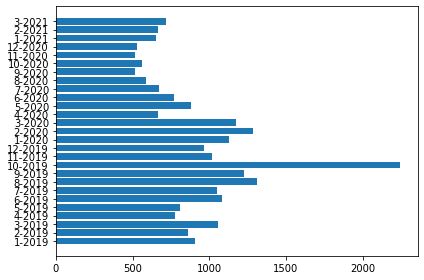

In [13]:
plt.barh('m_y', 'ride_count', data=metro_by_date)
plt.tight_layout()

Export to CSV file

In [14]:
metro_by_date.to_csv('../data/By_Date/metro_by_date.csv')